In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl

from matplotlib import pyplot as plt
from matplotlib import dates as mdates
from sklearn.preprocessing import StandardScaler

from statsmodels.tsa.seasonal import STL

%matplotlib inline
sns.set_style("whitegrid")

plt.rc("figure", figsize=(11,6))
plt.rc("font", size=15)
plt.tight_layout()

print("Pandas Version: " + pd.__version__)
print("Numpy Version: " + np.__version__)
print("Seaborn Version: " + sns.__version__)

Pandas Version: 1.2.4
Numpy Version: 1.18.5
Seaborn Version: 0.11.1


<Figure size 792x432 with 0 Axes>

In [2]:
df_trips = pd.read_csv("../../data/clean/trips.csv", parse_dates=["date_from", "date_until"])
df_trips.head(3)

,bike_id,user_id,date_from,date_until,start_station_name,start_station_id,end_station_name,end_station_id,booked_via,duration_in_min,distance_in_km,speed_in_kmh,time_since_last_checkout
0,119911,341973A96CDE0DF9792F6C844622735AE4216EBF,2014-01-01 00:02:51,2014-01-01 00:20:04,Enckeplatz / Hütten,131887,Königstraße / Struenseestraße,131650,Terminal HH_8 (-2624-),18,2.364129,7.880431,NaN
1,118994,665D79F269FA03F84FC61F3A7F7B078D7392EC0E,2014-01-01 00:07:45,2014-01-01 00:10:48,Isestraße / Hoheluftbrücke,140804,Isestraße / Hoheluftbrücke,140804,Terminal HH_63 (-2241-),4,0.000000,0.000000,NaN
2,143660,B46B52FDC494E46849DB84BF84F0B99C78358E59,2014-01-01 00:09:55,2014-01-01 00:26:20,Schulterblatt/Eifflerstraße,131648,Schulterblatt/Eifflerstraße,131648,Android SRH,17,0.000000,0.000000,NaN


In [4]:
weather = pd.read_csv("../../data/clean/weather.csv", parse_dates=["datetime"])
weather.set_index("datetime", inplace=True)
weather.head(3)

,precip_intensity,precip_probability,precip_type,temperature,humidity,wind_speed,wind_bearing,uv_index,visibility
datetime,,,,,,,,,
2014-01-01 00:00:00,0.0,0.0,none,1.93,0.81,3.91,161.0,0,9.988
2014-01-01 01:00:00,0.0,0.0,none,1.94,0.85,4.56,140.0,0,6.004
2014-01-01 02:00:00,0.0,0.0,none,1.81,0.85,4.12,143.0,0,9.988


In [5]:
trips = df_trips.set_index("date_from").sort_index()

In [6]:
trips.index.min()

Timestamp('2014-01-01 00:02:51')

In [7]:
trips.index.max()

Timestamp('2017-05-16 08:08:09')

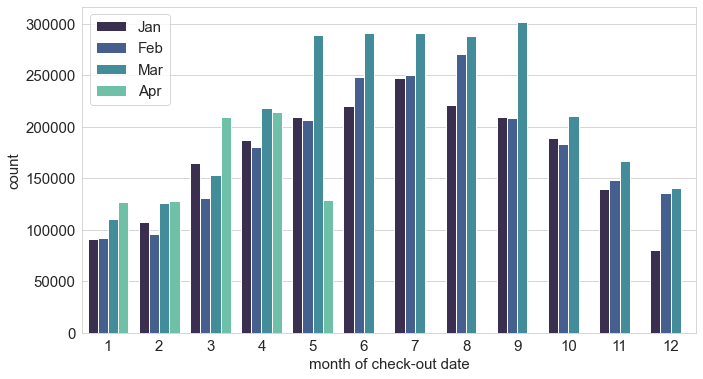

In [8]:
# Trips by month and by year
ax = sns.countplot(
    x=trips.index.month,
    hue=trips.index.year,
    data=trips,
    palette="mako"
)
ax.set(xlabel="month of check-out date", ylabel="count")
plt.legend(labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Nov", "Dec"])
plt.savefig("../../figures/count_trips_per_month.pdf", bbox_inches="tight")
plt.show()

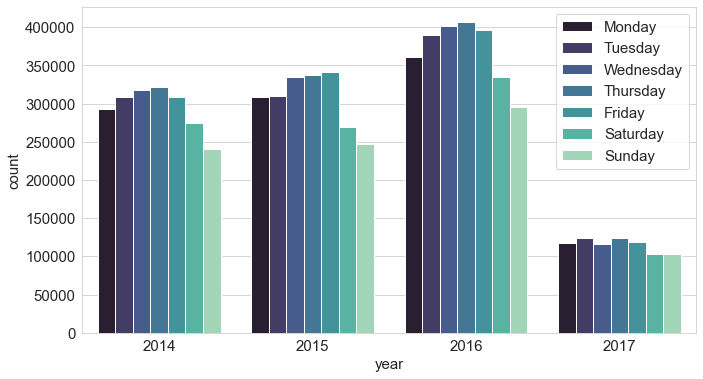

In [9]:
ax = sns.countplot(
    x=trips.index.year,
    hue=trips.index.weekday,
    data=trips,
    palette="mako"
)
ax.set(xlabel="year", ylabel="count")
plt.legend(labels=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.savefig("../../figures/count_trips_per_weekday.pdf", bbox_inches="tight")
plt.show()

In [10]:
grouped_by_year_and_month = trips.groupby([trips.index.year, trips.index.month])

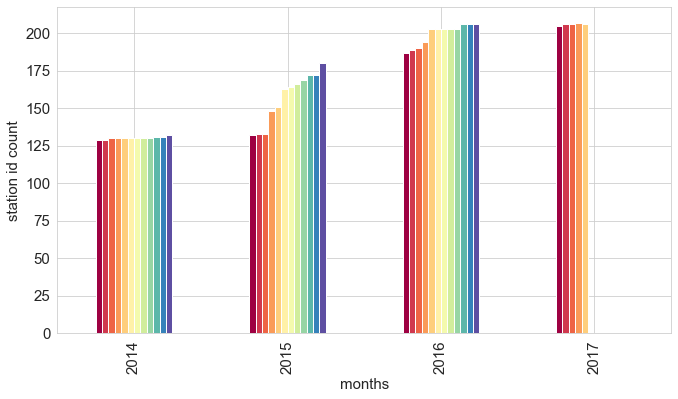

In [11]:
stations_per_month = pd.DataFrame(grouped_by_year_and_month.start_station_name.nunique()).unstack()
stations_per_month.plot(kind="bar", legend=False, cmap="Spectral")
plt.xlabel("months")
plt.ylabel("station id count")
plt.savefig("../../figures/count_unique_stations_per_months.pdf", bbox_inches="tight")
plt.show()

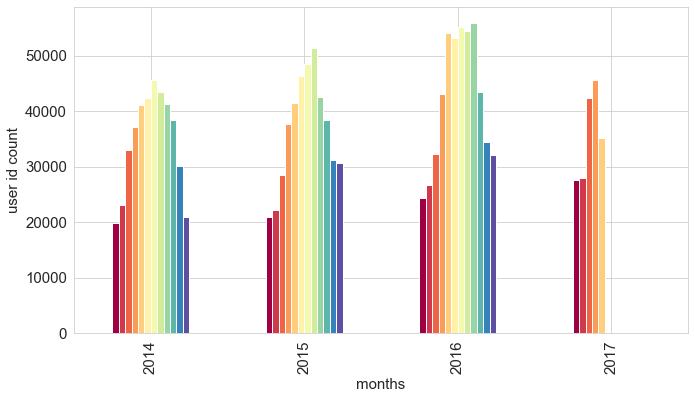

In [12]:
users_per_month = pd.DataFrame(grouped_by_year_and_month.user_id.nunique()).unstack()
users_per_month.plot(kind="bar", legend=False, cmap="Spectral")
plt.xlabel("months")
plt.ylabel("user id count")
plt.savefig("../../figures/count_unique_users_per_months.pdf", bbox_inches="tight")
plt.show()

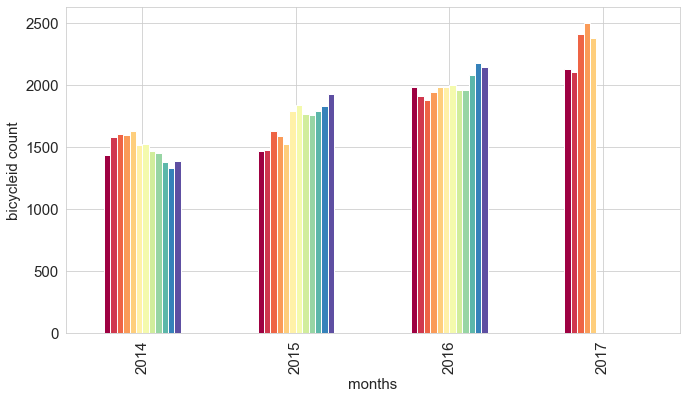

In [13]:
bikes_per_month = pd.DataFrame(grouped_by_year_and_month.bike_id.nunique()).unstack()
bikes_per_month.plot(kind="bar", legend=False, cmap="Spectral")
plt.xlabel("months")
plt.ylabel("bicycleid count")
plt.savefig("../../figures/count_unique_bikes_per_months.pdf", bbox_inches="tight")
plt.show()

## Explore trend and seasonality

In [14]:
plt.rc("font", size=13)

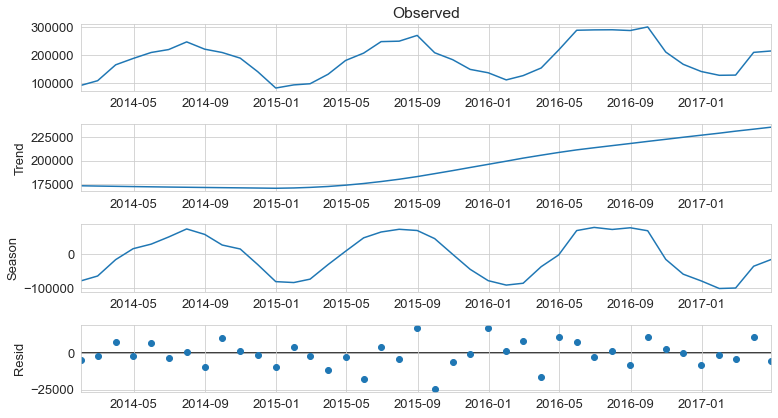

In [15]:
monthly_check_outs = trips[pd.Timestamp("2014-01-01"):pd.Timestamp("2017-04-30 23:59:59")]
monthly_check_outs = monthly_check_outs[["bike_id"]].resample("M").count().rename(columns={"bike_id": "count"})
STL(monthly_check_outs, period=12).fit().plot()
plt.savefig("../../figures/stl_months.pdf", bbox_inches="tight")
plt.show()

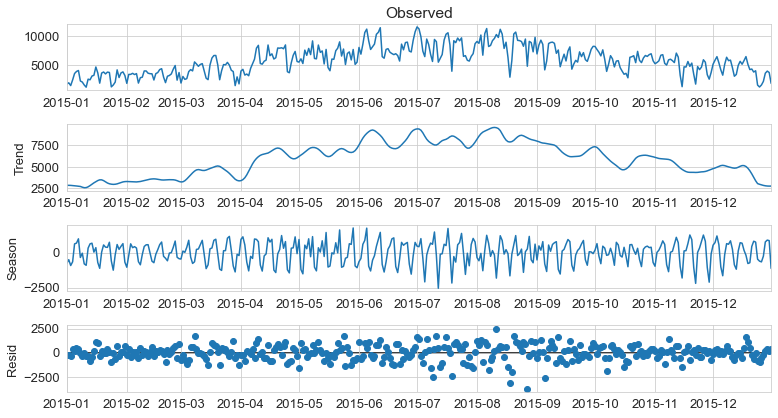

In [16]:
daily_check_outs = trips[pd.Timestamp("2015-01-01"):pd.Timestamp("2015-12-31 23:59:59")]
daily_check_outs = daily_check_outs[["bike_id"]].resample("D").count().rename(columns={"bike_id": "count"})
STL(daily_check_outs).fit().plot()
plt.savefig("../../figures/stl_days.pdf", bbox_inches="tight")
plt.show()

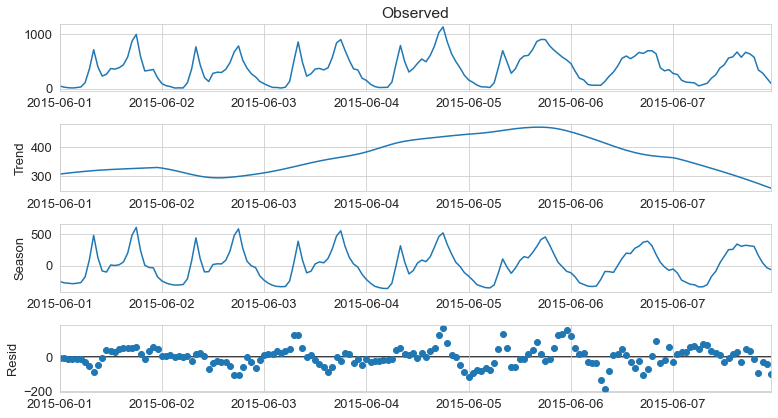

In [17]:
hourly_check_outs = trips[pd.Timestamp("2015-06-01"):pd.Timestamp("2015-06-07 23:59:50")]
hourly_check_outs = hourly_check_outs[["bike_id"]].resample("H").count().rename(columns={"bike_id": "count"})
STL(hourly_check_outs, period=24).fit().plot()
plt.savefig("../../figures/stl_hours.pdf", bbox_inches="tight")
plt.show()

In [18]:
plt.rc("font", size=15)

## Plot distribution of values

In [19]:
def display_distribution(attribute, label, bins):
    values = trips[[attribute]]
    plt.figure(figsize=(16,5))
    plt.hist(values, alpha=0.7, bins=bins)
    plt.xlabel(label)
    plt.ylabel("count")
    plt.savefig("../../figures/trips_hist_%s.pdf"%attribute, bbox_inches="tight")
    plt.show()

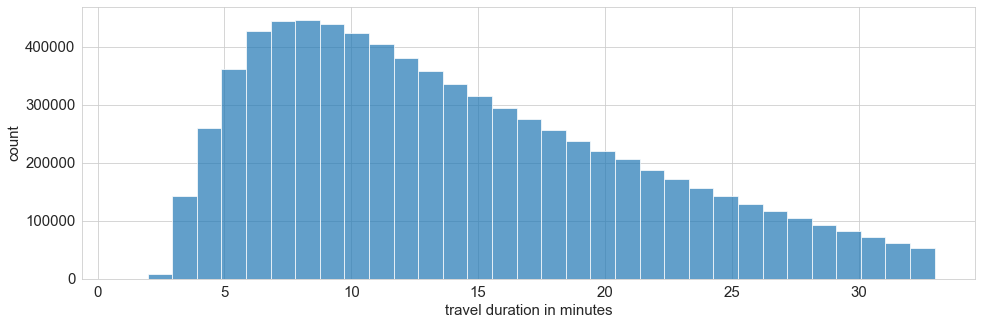

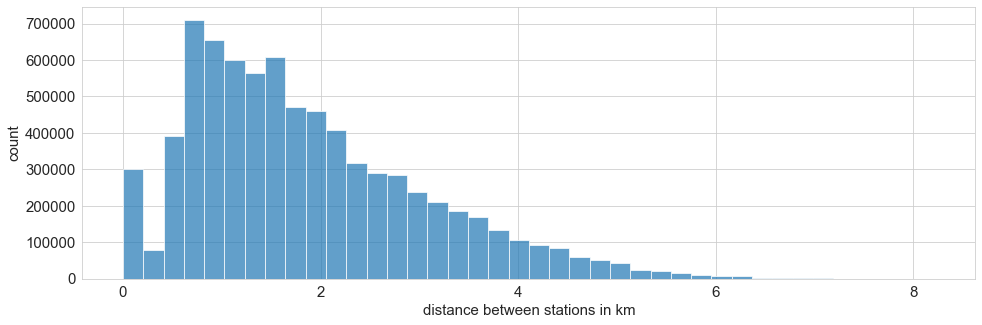

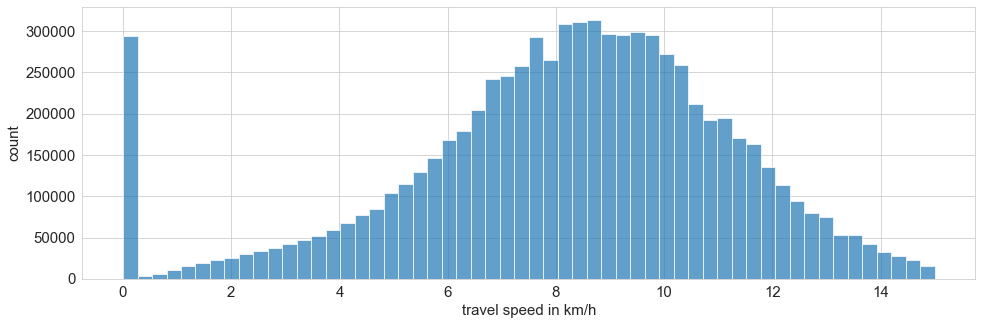

In [20]:
display_distribution("duration_in_min", label="travel duration in minutes", bins=33)
display_distribution("distance_in_km", label="distance between stations in km", bins=40)
display_distribution("speed_in_kmh", label="travel speed in km/h", bins=56)

## Plot count of "technical income channel" occurrence

In [21]:
booked_via = trips[["booked_via"]].copy()
booked_via.loc[booked_via.booked_via.str.startswith("Terminal"), "booked_via"] = "Terminal"
booked_via.loc[booked_via.booked_via.str.startswith("terminal"), "booked_via"] = "Terminal"
booked_via.loc[booked_via.booked_via.str.startswith("Techniker"), "booked_via"] = "Techniker"
booked_via.loc[booked_via.booked_via.str.startswith("Starenkasten"), "booked_via"] = "Starenkasten"

rarely_used_booked_via = [
    'Android',
    'BlackBerry',
    'Windows',
    'iPhone KON',
    'CaB - Mobility Map',
    'LIDL-BIKE',
    'Android KON',
    'Starenkasten'
]

booked_via["booked_via"] = booked_via[["booked_via"]].replace(rarely_used_booked_via, "Other")

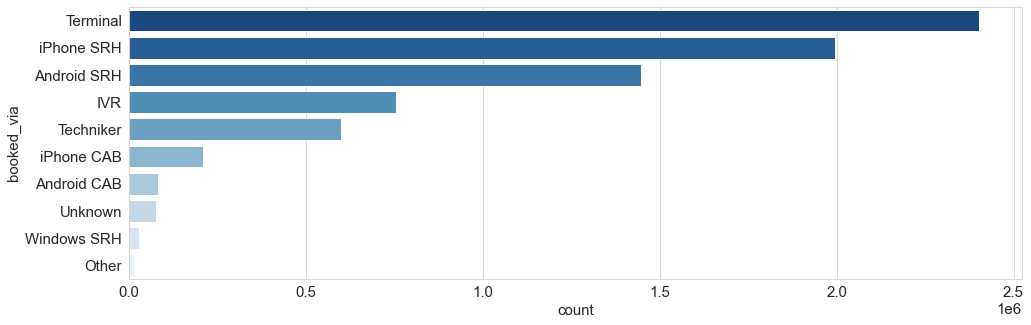

In [22]:
plt.figure(figsize=(16,5))
ax = sns.countplot(
    data=booked_via,
    y="booked_via",
    order=booked_via.booked_via.value_counts().index,
    palette="Blues_r"
)
ax.set(xlabel="count", ylabel="booked_via")
plt.savefig("../../figures/trips_hist_booked_via.pdf", bbox_inches="tight")
plt.show()

## Plot trip count per day, week and month

In [23]:
full_day_start_date = "2014-01-07" # first day
full_day_end_date = "2017-05-14 23:59:59" # last complete day
daily_trips = trips[
    pd.Timestamp(full_day_start_date):pd.Timestamp(full_day_end_date)
].resample("D")[["bike_id"]].count().rename(columns={"bike_id": "count"})

full_week_start_date = "2014-01-07" # first Sunday morning
full_week_end_date = "2017-05-14 23:59:59" # last Monday evening
weekly_mean = daily_trips[
    pd.Timestamp(full_week_start_date):pd.Timestamp(full_week_end_date)
].resample("W").mean()

full_month_start_date = "2014-01-01" # first day
full_month_end_date = "2017-04-30 23:59:59" # last day of last complete month
monthly_mean = daily_trips[
    pd.Timestamp(full_month_start_date):pd.Timestamp(full_month_end_date)
].resample("M").mean()

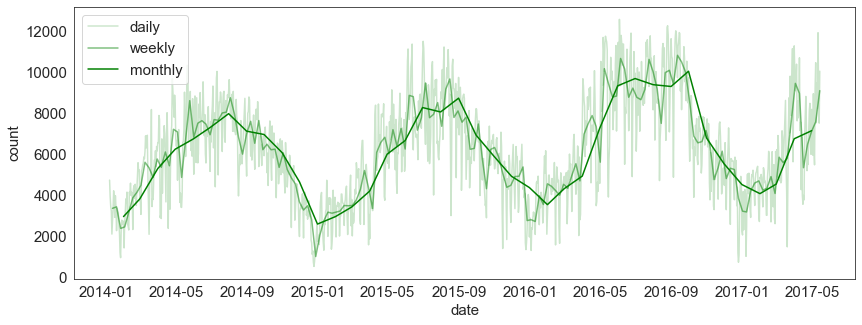

In [24]:
plt.rc("figure", figsize=(14,5))
sns.set_style("white")

plt.plot(daily_trips, label="daily", color="green", alpha=0.2)
plt.plot(weekly_mean, label="weekly", color="green", alpha=0.5)
plt.plot(monthly_mean, label="monthly", color="green")
plt.xlabel("date")
plt.ylabel("count")
plt.legend(loc="upper left")
plt.savefig("../../figures/trips_mean_values.pdf", bbox_inches="tight")
plt.show()

sns.set_style("whitegrid")

## Count yearly trip amount

In [25]:
full_year_start_date = "2014-01-01" # first day
full_year_end_date = "2016-12-12 23:59:59" # last day of last complete year
yearly_count = trips[
    pd.Timestamp(full_year_start_date):pd.Timestamp(full_year_end_date)
].resample("Y")[["bike_id"]].count()

yearly_count

,bike_id
date_from,
2014-12-31,2064964
2015-12-31,2149737
2016-12-31,2506183


## Plot correlation with weather data

In [26]:
# Remove the last trips that do not form a complete week
trips = trips.loc["2014-01-01":"2017-05-14"]

In [27]:
weekly_weather = weather.resample("W").mean()
weekly_trips_count = trips[["bike_id"]].resample("W").count().rename(columns={"bike_id": "trip_count"})

weekly = weekly_weather.merge(weekly_trips_count, left_index=True, right_index=True)
weekly

,precip_intensity,precip_probability,temperature,humidity,wind_speed,wind_bearing,uv_index,visibility,trip_count
2014-01-05,0.013578,0.041000,5.441833,0.859000,4.138833,179.083333,0.000000,9.838858,13357
2014-01-12,0.044758,0.072381,6.999286,0.861131,5.395536,228.982143,0.000000,9.719101,23329
2014-01-19,0.030308,0.047143,3.906964,0.933155,3.653869,133.398810,0.035714,7.280048,24101
2014-01-26,0.000279,0.001488,-4.939464,0.843988,4.517500,102.607143,0.083333,7.852720,16757
2014-02-02,0.009192,0.018333,-1.639107,0.864167,4.060714,128.422619,0.130952,7.718012,17274
...,...,...,...,...,...,...,...,...,...
2017-04-16,0.071538,0.091845,7.869583,0.749821,3.919405,265.982143,1.119048,9.730935,37436
2017-04-23,0.023692,0.040417,5.781012,0.678512,2.986429,226.461310,1.250000,9.771304,45429
2017-04-30,0.042130,0.046964,6.534286,0.687202,2.587500,223.077381,1.410714,9.978899,49881
2017-05-07,0.037746,0.043988,10.089524,0.707440,3.171250,88.273810,1.476190,9.553851,53036


In [28]:
weekly_scaled = weekly.copy()
weekly_scaled[weekly_scaled.columns] = StandardScaler().fit_transform(weekly_scaled[weekly_scaled.columns])
weekly_scaled

,precip_intensity,precip_probability,temperature,humidity,wind_speed,wind_bearing,uv_index,visibility,trip_count
2014-01-05,-0.656009,0.201673,-0.746555,0.877174,0.451449,-0.298233,-1.174235,0.795626,-1.973006
2014-01-12,0.307141,1.301493,-0.496261,0.902046,1.457330,0.771091,-1.174235,0.682331,-1.312600
2014-01-19,-0.139226,0.416964,-0.993220,1.742704,0.063277,-1.277245,-1.118971,-1.625121,-1.261474
2014-01-26,-1.066784,-1.183115,-2.414909,0.701956,0.754538,-1.937106,-1.045287,-1.083348,-1.747838
2014-02-02,-0.791484,-0.592734,-1.884517,0.937479,0.388921,-1.383884,-0.971603,-1.210788,-1.713599
...,...,...,...,...,...,...,...,...,...
2017-04-16,1.134347,1.983665,-0.356397,-0.397152,0.275815,1.563996,0.557345,0.693525,-0.378350
2017-04-23,-0.343591,0.181229,-0.692047,-1.229473,-0.470951,0.717070,0.759976,0.731716,0.150995
2017-04-30,0.225965,0.410706,-0.570990,-1.128038,-0.790259,0.644553,1.008661,0.928111,0.445833
2017-05-07,0.090531,0.306398,0.000364,-0.891820,-0.323018,-2.244267,1.109977,0.525997,0.654776


<Figure size 1152x576 with 0 Axes>

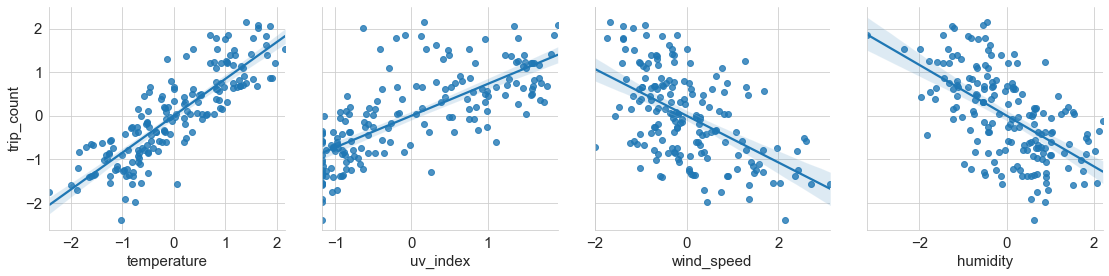

In [29]:
plt.figure(figsize=(16,8))
x_vars = ["temperature", "uv_index", "wind_speed", "humidity"]
y_vars = ["trip_count"]
g = sns.PairGrid(weekly_scaled, x_vars = x_vars, y_vars=y_vars, height=4)
g.map_offdiag(sns.regplot)
plt.savefig("../../figures/trips_weather_corr_scatter.pdf", bbox_inches="tight")
plt.show()

<Figure size 1152x576 with 0 Axes>

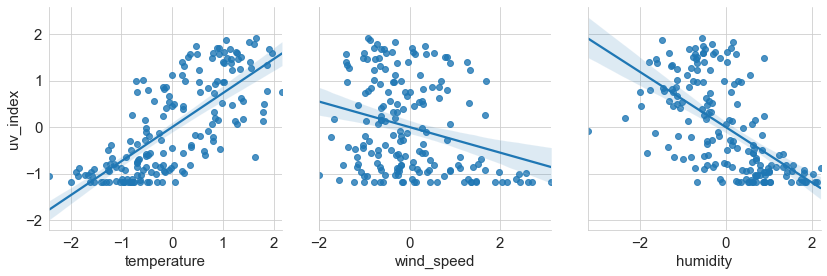

In [30]:
plt.figure(figsize=(16,8))
x_vars = ["temperature", "wind_speed", "humidity"]
y_vars = ["uv_index"]
g = sns.PairGrid(weekly_scaled, x_vars = x_vars, y_vars=y_vars, height=4)
g.map_offdiag(sns.regplot)

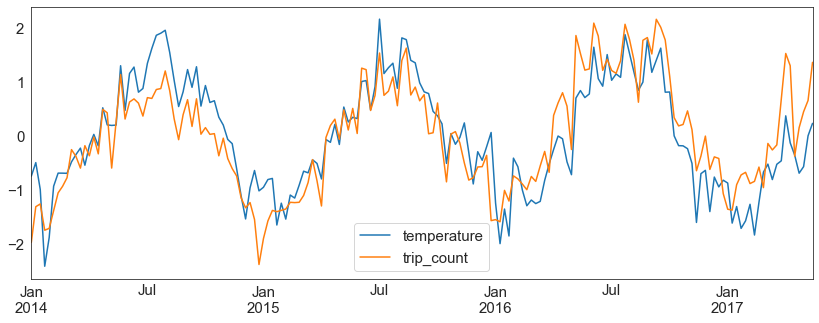

In [31]:
sns.set_style("white")

weekly_scaled.temperature.plot()
weekly_scaled.trip_count.plot()
plt.legend()
plt.savefig("../../figures/trips_temperature.pdf", bbox_inches="tight")
plt.show()

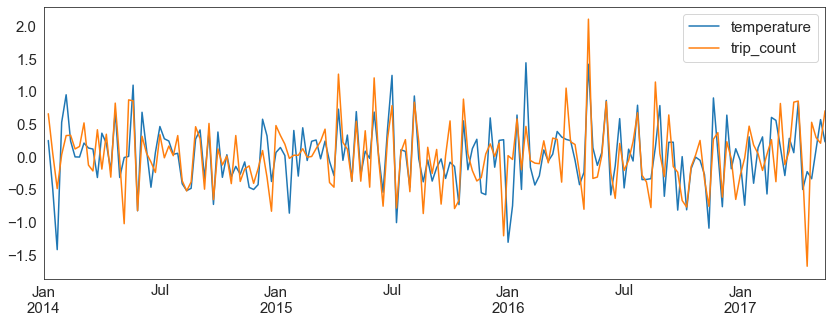

In [32]:
weekly_scaled.diff().temperature.plot()
weekly_scaled.diff().trip_count.plot()
plt.legend()

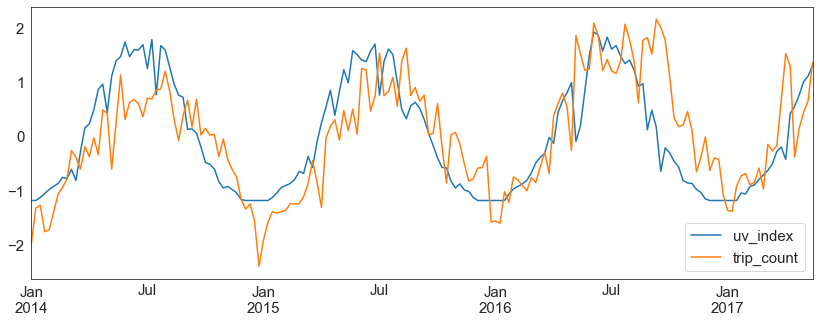

In [33]:
weekly_scaled.uv_index.plot()
weekly_scaled.trip_count.plot()
plt.legend()
plt.savefig("../../figures/trips_uv_index.pdf", bbox_inches="tight")
plt.show()

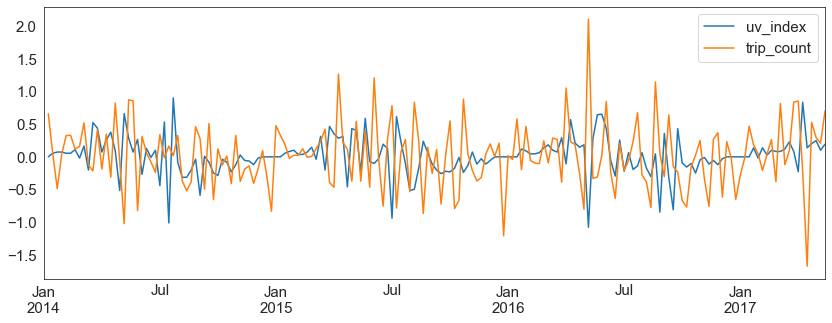

In [34]:
weekly_scaled.diff().uv_index.plot()
weekly_scaled.diff().trip_count.plot()
plt.legend()

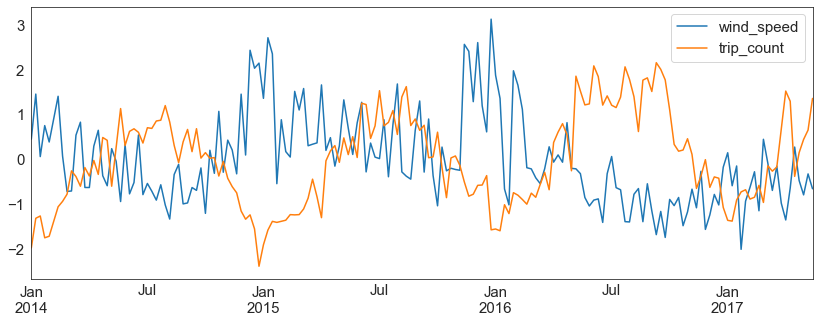

In [35]:
weekly_scaled.wind_speed.plot()
weekly_scaled.trip_count.plot()
plt.legend()
plt.savefig("../../figures/trips_wind_speed.pdf", bbox_inches="tight")
plt.show()

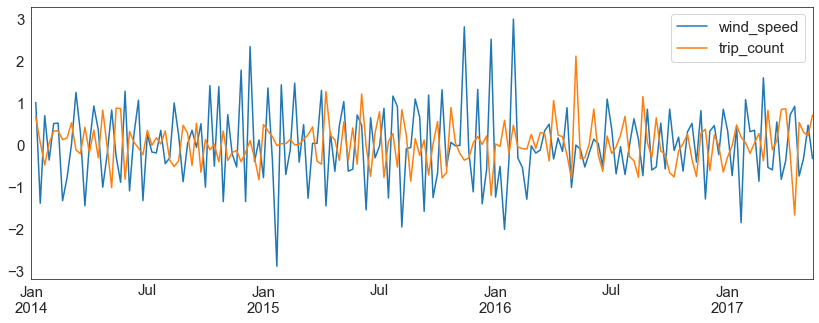

In [36]:
weekly_scaled.diff().wind_speed.plot()
weekly_scaled.diff().trip_count.plot()
plt.legend()

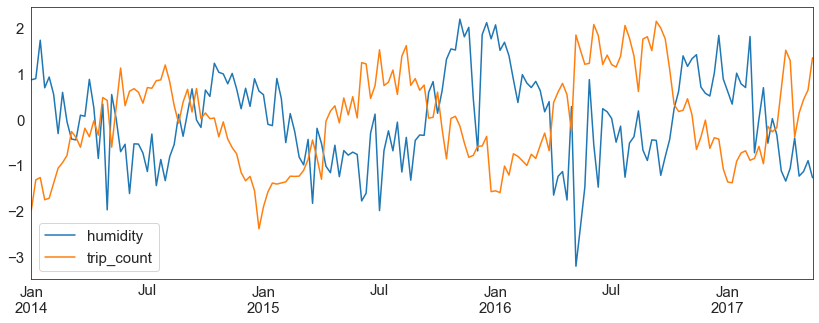

In [37]:
weekly_scaled.humidity.plot()
weekly_scaled.trip_count.plot()
plt.legend()
plt.savefig("../../figures/trips_humidity.pdf", bbox_inches="tight")
plt.show()

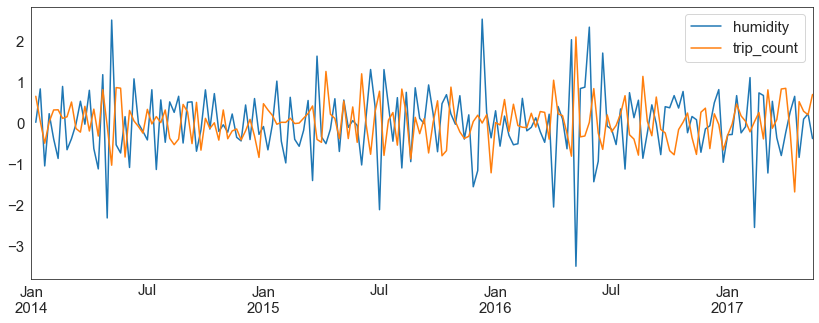

In [38]:
weekly_scaled.diff().humidity.plot()
weekly_scaled.diff().trip_count.plot()
plt.legend()